In [5]:
#import library numpy dan pandas
import numpy as np
import pandas as pd

import seaborn as sns

#membaca file csv
df=pd.read_csv('MariBisnis.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
#import library matplotlib dan linaear regresion
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df = pd.read_csv('MariBisnis.csv', usecols=['bedrooms', 'bathrooms', 'sqft_living', 'grade', 'price', 'yr_built'])
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [7]:
#menampilkan data columns saat ini
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21613 non-null  float64
 1   bedrooms     21613 non-null  int64  
 2   bathrooms    21613 non-null  float64
 3   sqft_living  21613 non-null  int64  
 4   grade        21613 non-null  int64  
 5   yr_built     21613 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 1013.2 KB


In [8]:
#menampilkan stastik deskripsi dari data, mulai dari mean, kuartil, dll.
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [9]:
#mengubah tipe data bathroom menjadi int, karena terdapat value yang tidak bulat
df['bathrooms'] = df['bathrooms'].astype('int')
#mengubah nilai max bedroom yang semula 33 menjadi 3.
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [10]:
#memastikan apakah ada nilai yang kosong 
df.isnull().sum()

price          0
bedrooms       0
bathrooms      0
sqft_living    0
grade          0
yr_built       0
dtype: int64

/anaconda/envs/azureml_py38/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


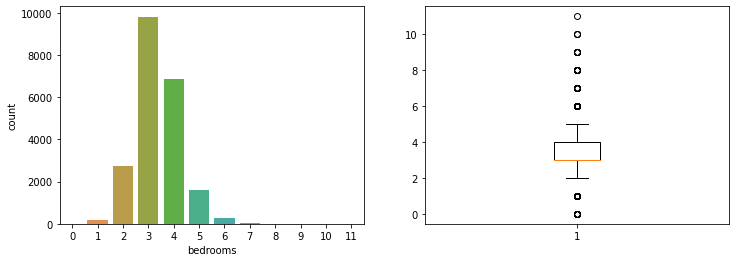

In [11]:
#menampilkan visualisasi data untuk bedroom
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1,2,2)
plt.boxplot(df['bedrooms'])

plt.show()

In [12]:
#mencari nilai korelasi dan independent variabel
df.corr().style.background_gradient().set_precision(2)

/tmp/ipykernel_5528/4240282873.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df.corr().style.background_gradient().set_precision(2)


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


In [13]:
import joblib
# membuat variabel x dan y
x = df.drop(columns='price')
y = df['price']

#melakukan spliting data untuk membagi antara training dan testing splliting dengan rasio 80:20
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=4)

#membuat object baru untuk linear regresi
lr = LinearRegression()

#training model
mymodel = lr.fit(x_train,y_train)

joblib.dump(mymodel, "mymodelsimple.pkl")
#mencari nilai koef dan intercept
pd.DataFrame({'Features':x.columns,'Coef Value':lr.coef_})
# print(lr.intercept_)

,Features,Coef Value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


In [14]:
#mencari skor akurasi
lr.score(x_test, y_test)

0.61251132869411

In [15]:
#membuat fungsi untuk mengkonversi mata uang usd ke idr
def idrCurrency(amount):
    thousands_separator = "."
    fractional_separator = ","
    currency = "Rp{:,.2f}".format(amount)

    if thousands_separator == ".":
        main_currency, fractional_currency = currency.split(".")[0], currency.split(".")[1]
        new_main_currency = main_currency.replace(",", ".")
        currency = new_main_currency + fractional_separator + fractional_currency

    return currency

In [16]:
#membuat variabel array rumah dan harga dengan numpy untuk digunakan pada dataframe
rumah = np.array(["Rumah Type S", "Rumah Type A", "Rumah Type B", "Rumah Type C", "Rumah Type D"])
harga = np.array([])

#menambahkan data pada variabel harga array
#melakukan prediksi menggunakan model yang sudah dibuat
final_price = np.append(harga,[idrCurrency(int(lr.predict([[6,4,1800,9,2005]])) * 14119),
idrCurrency(int(lr.predict([[5,3,1400,7,2005]]))* 14119),
idrCurrency(int(lr.predict([[4,2,1200,7,2005]]))* 14119),
idrCurrency(int(lr.predict([[3,2,1000,7,2008]]))* 14119),
idrCurrency(int(lr.predict([[2,1,700,7,2005]]))* 14119)])

# menampilkan data dalam bentuk dataframe
pd.DataFrame({'Type Rumah':rumah,'Prediksi Harga':final_price})

,Type Rumah,Prediksi Harga
0,Rumah Type S,"Rp7.546.916.118,00"
1,Rumah Type A,"Rp2.608.894.701,00"
2,Rumah Type B,"Rp1.911.726.719,00"
3,Rumah Type C,"Rp1.959.321.868,00"
4,Rumah Type D,"Rp1.163.560.909,00"


In [17]:
import azureml.core

print("SDK version:", azureml.core.VERSION)

SDK version: 1.34.0


In [18]:
from azureml.core import Workspace

ws = Workspace.from_config()
print(ws.name, ws.resource_group, ws.location, ws.subscription_id, sep='\n')

capstoneproject
azurestudent
southeastasia
da9269e9-53df-4c9b-a08a-f389a53057c3


In [21]:
import sklearn

from azureml.core import Workspace
from azureml.core import Model
from azureml.core.resource_configuration import ResourceConfiguration

ws = Workspace.from_config()

model = Model.register(workspace=ws,
                       model_name='mymodelsimple_house_price',                # Name of the registered model in your workspace.
                       model_path='./mymodelsimple.pkl')  # Local file to upload and register as a model.
                   

print('Name:', model.name)
print('Version:', model.version)

Registering model mymodelsimple_house_price
Name: mymodelsimple_house_price
Version: 1


In [22]:
%%writefile price.py

import json
import pickle
import numpy as np
import pandas as pd
import os
import joblib
from azureml.core.model import Model

from inference_schema.schema_decorators import input_schema, output_schema
from inference_schema.parameter_types.numpy_parameter_type import NumpyParameterType
from inference_schema.parameter_types.pandas_parameter_type import PandasParameterType


def init():
    global model
    # Replace filename if needed.
    path = os.getenv('AZUREML_MODEL_DIR') 
    model_path = os.path.join(path, 'mymodelsimple.pkl')
    # Deserialize the model file back into a sklearn model.
    model = joblib.load(model_path)


input_sample = pd.DataFrame(data=[{
    "bedrooms": 3,
    "bathrooms": 2,
    "sqft_living": 1000,
    "grade": 8,
    "yr_built": 2004
}])

# This is an integer type sample. Use the data type that reflects the expected result.
output_sample = np.array([0])

# To indicate that we support a variable length of data input,
# set enforce_shape=False
@input_schema('data', PandasParameterType(input_sample))
@output_schema(NumpyParameterType(output_sample))
def run(data):
    try:
        print("input_data....")
        print(data.columns)
        print(type(data))
        result = model.predict(data)
        print("result.....")
        print(result)
    # You can return any data type, as long as it can be serialized by JSON.
        return result.tolist()
    except Exception as e:
        error = str(e)
        return error

Writing price.py


In [23]:
from azureml.core.model import InferenceConfig
from azureml.core import Environment
from azureml.core.conda_dependencies import CondaDependencies

environment = Environment('my-housepredict-environment')
environment.python.conda_dependencies = CondaDependencies.create(pip_packages=[
    'azureml-defaults',
    'inference-schema[numpy-support]',
    'joblib',
    'numpy',
    'pandas',
    'scikit-learn=={}'.format(sklearn.__version__)
])

inference_config = InferenceConfig(entry_script='./price.py',environment=environment)

In [24]:
service_name = 'my-houseprediction-model'

service = Model.deploy(ws, service_name, [model], inference_config, overwrite=True)
service.wait_for_deployment(show_output=True)

Tips: You can try get_logs(): https://aka.ms/debugimage#dockerlog or local deployment: https://aka.ms/debugimage#debug-locally to debug if deployment takes longer than 10 minutes.
Running
2021-11-16 14:15:07+00:00 Creating Container Registry if not exists.
2021-11-16 14:15:08+00:00 Registering the environment.
2021-11-16 14:15:11+00:00 Building image..
2021-11-16 14:20:27+00:00 Generating deployment configuration..
2021-11-16 14:20:28+00:00 Submitting deployment to compute..
2021-11-16 14:20:39+00:00 Checking the status of deployment my-houseprediction-model..
2021-11-16 14:22:33+00:00 Checking the status of inference endpoint my-houseprediction-model.
Succeeded
ACI service creation operation finished, operation "Succeeded"
